In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from hydra import initialize, compose
from lenstronomy.Plots import plot_util
from glob import glob

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import overplot
from mejiro.lenses.test import SampleSkyPyLens
from mejiro.helpers import pyhalo

In [2]:
array_dir = os.path.join(array_dir, 'sample_skypy_lens')
pickle_dir = os.path.join(pickle_dir, 'pyhalo')

In [4]:
# load the Pandeia image
pandeia = np.load(os.path.join(array_dir, 'sample_skypy_lens_5_1000000.npy'))

# grab the model from which the image was generated so things can be calculated
lens = SampleSkyPyLens()

# add CDM subhalos; NB same subhalo population for all
lens.add_subhalos(*pyhalo.unpickle_subhalos(os.path.join(pickle_dir, 'cdm_subhalos_tuple')))

model = lens.get_array(num_pix=45, side=4.95)

In [ ]:
# grab lenses for all filters from Pandeia dir
all_filters = glob(array_dir + f'/pandeia_{uid}_*.npy')

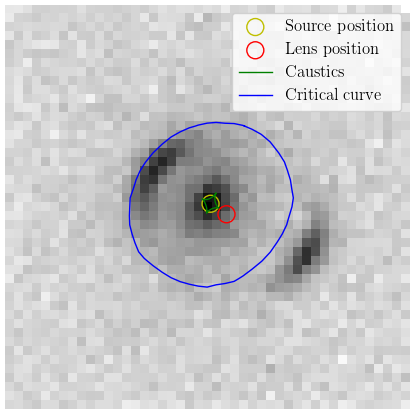

In [6]:
fig, ax = plt.subplots()

ax.imshow(np.log10(pandeia), cmap='binary')

overplot.source_position(ax, lens)
overplot.lens_position(ax, lens)
overplot.caustics(ax, lens)
overplot.critical_curves(ax, lens)

# plot_util.scale_bar(ax, d=1, color='k')
# plot_util.source_position_plot(ax, coords, [ra_source], [dec_source])

plt.axis(False)
plt.legend(fontsize=12)

plt.savefig(os.path.join(figure_dir, 'roman_image.png'))
plt.show()